In [ ]:
conda env export > environment.yml

In [25]:
import os
import re, string, unicodedata
import pandas as pd 
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='solarizedl')

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, WhitespaceTokenizer
from nltk.corpus import stopwords
import inflect
from spellchecker import SpellChecker
import csv

In [457]:
def csv2dict(csv_name):
    with open(csv_name, mode='r') as f:
        reader = csv.reader(f)
        next(reader)
        return {rows[1]:rows[2] for rows in reader}
    
word_expansion_dict = csv2dict('word_expansion.csv')

In [510]:
print(len(location_expansion_dict))

69


In [488]:
location_expansion_dict = csv2dict('location_expansion.csv')
word_expansion_dict = csv2dict('word_expansion.csv')

{'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'PW': 'Palau',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Vi

In [553]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [554]:
df.location = df.location.astype(str)

In [508]:
def word_expansion(text, word_dict):
    c_re = re.compile('|'.join('(\b%s\b)' % re.escape(s) for s in word_dict.keys()), re.IGNORECASE)
    def replace(match):
        expansion =  f"{word_dict[match.group(0)]}"
        return expansion
    text = c_re.sub(replace, text)
    return text

In [555]:
def expand_hashtags(text):
    hashtag_list = []
    hashtag_exp_list = []


    def proper_nouns_lower(text): 
        text = re.sub('#', ' ', text)
        proper_noun = re.match(r"(?<=[A-Z])[a-z]", text)
        if text is proper_noun:
            new_string = re.sub(proper_noun, proper_noun.group(0).lower(), text)
        else:
            new_string = text
        return new_string

    def word_expansion(text):
        c_re = re.compile('|'.join('(\b%s\b)' % re.escape(s) for s in word_expansion_dict.keys()), re.IGNORECASE)
        def replace(match):
            expansion =  f" {word_expansion_dict[match.group(0)]}"
            return expansion
        text = c_re.sub(replace, text.lower())
        return text

    def camel_case_split(text):
        text = re.sub('#', ' ', text)
        exp_hashtags = re.sub(r'((?<!\A)(?<=[a-z])[A-Z]|(?<!\A)(?=[A-Z])[a-z+])', r' \1', text)
        # h2.append(re.sub(r'((?<!\A)(?<=[A-Z])[a-z])', r' \1', text))
        return exp_hashtags
        
        
    def denoise_text(text):
        new_text = re.sub(r"\S*https?:\S*",  r"", text)
        new_text_punct = re.sub(r"[^\w\s#]",  r"", new_text)
        new_text_chars = re.sub('[^\u0000-\u007f]', '',  new_text_punct)
        new_text_ = re.sub('_', '',  new_text_chars)
        return new_text_
    
    def replace_numbers(tokens):
# replace integers with string formatted words for numbers
        dig2word = inflect.engine()
        new_tokens = []
        for word in tokens:
            if word.isdigit():
                new_word = dig2word.number_to_words(word)
                new_tokens.append(new_word)
            else:
                new_tokens.append(word)
        return new_tokens
    
    for tweet in text:
        for x in tweet.split():
            if x.startswith('#') == True:
                clean_text = denoise_text(x)
                cleaner_text = replace_numbers(clean_text)
                hashtag_list.append(''.join(cleaner_text))
                
    for hashtag in hashtag_list: 
        exp_hashtag = camel_case_split(hashtag)
        strip_hash = exp_hashtag.strip()
        hashtag_exp_list.append(strip_hash)
        
    return dict(zip(hashtag_list, hashtag_exp_list))

In [556]:
loc_hashtags_dict = expand_hashtags(df.location)

In [557]:
loc_hashtags_dict

{'#FLIGHTCITY': 'FLIGHTCITY',
 '#Islamophobe': 'Islamophobe',
 '#UNITE': 'UNITE',
 '#GDJB': 'GDJB',
 '#ASOT': 'ASOT',
 '#TMW': 'TMW',
 '#RT': 'RT',
 '#expelcly': 'expelcly',
 '#SOUTHAMPTON': 'SOUTHAMPTON',
 '#EngleWood': 'Engle Wood',
 '#WhereverImAt': 'Wherever Im At',
 '#ninethreeseven#seventhreefour': 'ninethreeseven seventhreefour',
 '#KardashianEmpire': 'Kardashian Empire',
 '#TORK': 'TORK',
 '#Bummerville': 'Bummerville',
 '#ForeverWithBAP': 'Forever With BAP',
 '#HAMont': 'HAMont',
 '#allover': 'allover',
 '#LemonGang': 'Lemon Gang',
 '#': '',
 '#MadeInNorthumberland': 'Made In Northumberland',
 '#keepthefaith': 'keepthefaith',
 '#otrakansascity': 'otrakansascity',
 '#Fairie': 'Fairie',
 '#WashingtonState': 'Washington State',
 '#Seattle': 'Seattle',
 '#BlackLivesMatter': 'Black Lives Matter',
 '#one': 'one',
 '#onesevenifour': 'onesevenifour',
 '#partsunknown': 'partsunknown',
 '#goingdownthetoilet': 'goingdownthetoilet',
 '#freegucci': 'freegucci',
 '#twoMBikers': 'two MBikers

In [466]:
hashtags_dict = expand_hashtags(df.text)

In [533]:
#### text preprocessing specifically formatted for tweets but will work on any text
def tweet_preprocess(df): 
    """combine regex and nltk processing for tweet text processing"""


    def word_expansion(text):
        c_re = re.compile('|'.join('(\b%s\b)' % re.escape(s) for s in word_expansion_dict.keys()), re.IGNORECASE)
        def replace(match):
            expansion =  f" {word_expansion_dict[match.group(0)]}"
            return expansion
        text = c_re.sub(replace, text.lower())
        return text
    
    def camel_sub(text):
        cam_re =  re.compile('|'.join('(\b%s\b)' % re.escape(s) for s in hashtags_dict.keys()))
        def replace(match):
            expansion =  f" {hashtags_dict[match.group(0)]}"
            return expansion
        text = cam_re.sub(replace, text)
        return text
    



    # function to expand contractions, remove urls and characters before tokenization processing
    def denoise_text(text):
        ht_text = camel_sub(text)
        new_text = re.sub(r"\S*https?:\S*",  r"", ht_text)
        new_text_exp = word_expansion(new_text)
        x = re.sub('#cafire', 'california fire', new_text_exp)
        x = re.sub('#calfires', 'california fires', x)
        x = re.sub('#calwildfires', 'california wildfires', x)
        x = re.sub('#cadrought', 'california drought', x)
        new_text_punct = re.sub(r"[^\w\s@]",  r"", x)
        unicode_chars = re.sub('[^\u0000-\u007f]', '',  new_text_punct)
        strip_text = unicode_chars.strip()
        #remove_hashtags_text = re.sub('#\w+', '',  strip_text)
        return strip_text 
    
# tokenization & lemmatization function returns tokens    
    def lemmatize_text(text):
        tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
        lemmatizer = WordNetLemmatizer() 
        return [lemmatizer.lemmatize(w, pos='v') for w in tokenizer.tokenize(text)]

# tokenization & stemmer function returns tokens
    def stem_text(text):
        tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
        stemmer = PorterStemmer()
        return [stemmer.stem(w) for w in tokenizer.tokenize(text)]

    def replace_numbers(tokens):
# replace integers with string formatted words for numbers
        dig2word = inflect.engine()
        new_tokens = []
        for word in tokens:
            if word.isdigit():
                new_word = dig2word.number_to_words(word)
                new_tokens.append(new_word)
            else:
                new_tokens.append(word)
        return new_tokens
    
    def remove_non_ascii(tokens):
# remove non ascii characters from text
        new_tokens = []
        for word in tokens:
            new_token = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_tokens.append(new_token)
        return new_tokens
    
# remove stopwords   
    def remove_stopwords(tokens):
        stop_list = stopwords.words('english')  
        new_tokens = []
        for word in tokens:
            if word not in stop_list:
                new_tokens.append(word)
        return new_tokens
  
 
    def norm_text(tokens):
        words = replace_numbers(tokens)
        #tokens = remove_stopwords(words)
        words = remove_non_ascii(words)
        return words
    

    def process_text(text):
        clean_text = denoise_text(text)
        lem_text = lemmatize_text(clean_text)
        text = ' '.join([x for x in norm_text(lem_text)])
        text = re.sub(r"-",  r" ", text)
        return text
    
    new_df = [process_text(x) for x in df]

    return new_df 

h_re = '([a-z]+)(?=[A-Z])|([A-Z][a-z]+)'
        exp_hashtags = filter(None, re.split(h_re, text))
        new_hashtag =  ' '.join([x for x in exp_hashtags])
        return new_hashtag

In [558]:
def preprocess_location(df):
    def word_expansion(text):
        l_re = re.compile('|'.join('(\b%s\b)' % re.escape(s) for s in location_expansion_dict.keys()), re.IGNORECASE)
        def replace(match):
            expansion =  f" {location_expansion_dict[match.group(0)]}"
            return expansion
        text = l_re.sub(replace, text)
        return text
    
    def camel_sub(text):
        cam_re =  re.compile('|'.join('(\b%s\b)' % re.escape(s) for s in loc_hashtags_dict.keys()))
        def replace(match):
            expansion =  f" {loc_hashtags_dict[match.group(0)]}"
            return expansion
        text = cam_re.sub(replace, text)
        return text
    



    # tokenization & lemmatization function returns tokens    
    def lemmatize_text(text):
        tokenizer = TweetTokenizer(strip_handles=True)
        lemmatizer = WordNetLemmatizer() 
        return [lemmatizer.lemmatize(w, pos='n') for w in tokenizer.tokenize(text)]

    
    def remove_non_ascii(tokens):
# remove non ascii characters from text
        new_tokens = []
        for word in tokens:
            new_token = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_tokens.append(new_token)
        return new_tokens
    
    def norm_text(tokens):
        words = remove_non_ascii(tokens)
        return words
    
    def denoise_location_text(text):
        text = str(text)
        new_text = re.sub(r"\S*https?:\S*",  r"", text)
        new_text_contractions = word_expansion(new_text)
        new_string = re.sub(r"[^\w\s]",  r" ", new_text_contractions.lower())
        unicode_string = re.sub('[^\u0000-\u007f]', '',  new_string)
        new_text_contractions = word_expansion(unicode_string)
        clean_text = re.sub(r"est september   ",  r"", unicode_string)
        lem_text = lemmatize_text(clean_text)
        text = ' '.join([x for x in norm_text(lem_text)])
        text = re.sub(r"-",  r" ", text)
        return text

    
    new_df = [denoise_location_text(x) for x in df]
    return new_df 



In [560]:
#hashtags = extract_hashtags(df.text)
df['tweets'] = tweet_preprocess(df.text)
df['keyword'] = tweet_preprocess(df.keyword.astype(str).replace({r"%20" : r" "}, regex=True))

In [559]:
df['clean_location'] = preprocess_location(df.location)

In [562]:
df.to_csv('train_update.csv')

In [24]:
train_X = df.filter(['tweets','clean_location','keyword'], axis=1)
train_y = df.filter(['target'], axis=1)

In [43]:
all_text = df.tweets + " " + df.clean_location + " " + df.keyword
all_text

0       our deeds be the reason of this earthquake may...
1           forest fire near la ronge sask canada nan nan
2       all residents ask to shelter in place be be no...
3       thirteen thousand people receive wildfires eva...
4       just get send this photo from ruby alaska as s...
                              ...                        
7604    world news fall powerlines on glink tram you p...
7605    on the flip side i be at walmart and there be ...
7606    suicide bomber kill fifteen in saudi security ...
7608    two giant crane hold a bridge collapse into ne...
7612    the latest more home raze by northern californ...
Length: 7503, dtype: object

In [44]:
df['all_text'] = all_text
df

,id,keyword,location,text,target,tweets,clean_location,all_text
0,1,nan,nan,Our Deeds are the Reason of this #earthqua...,1,our deeds be the reason of this earthquake may...,nan,our deeds be the reason of this earthquake may...
1,4,nan,nan,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,nan,forest fire near la ronge sask canada nan nan
2,5,nan,nan,All residents asked to 'shelter in place' ar...,1,all residents ask to shelter in place be be no...,nan,all residents ask to shelter in place be be no...
3,6,nan,nan,"13,000 people receive #wildfires evacuation o...",1,thirteen thousand people receive wildfires eva...,nan,thirteen thousand people receive wildfires eva...
4,7,nan,nan,Just got sent this photo from Ruby # Alaska...,1,just get send this photo from ruby alaska as s...,nan,just get send this photo from ruby alaska as s...
...,...,...,...,...,...,...,...,...
7604,10863,nan,nan,# World News Fallen powerlines on G:link tr...,1,world news fall powerlines on glink tram you p...,nan,world news fall powerlines on glink tram you p...
7605,10864,nan,nan,on the flip side I'm at Walmart and there i...,1,on the flip side i be at walmart and there be ...,nan,on the flip side i be at walmart and there be ...
7606,10866,nan,nan,Suicide bomber kills 15 in Saudi security s...,1,suicide bomber kill fifteen in saudi security ...,nan,suicide bomber kill fifteen in saudi security ...
7608,10869,nan,nan,Two giant cranes holding a bridge collapse i...,1,two giant crane hold a bridge collapse into ne...,nan,two giant crane hold a bridge collapse into ne...


In [ ]:
pos_text_tags = df['tweets'].apply(lambda row: [nltk.pos_tag(row) for item in row])
pos_keyword_tags = df['keyword'].apply(lambda row: [nltk.pos_tag(row) for item in row])

Text(0.5, 1.0, 'target count')

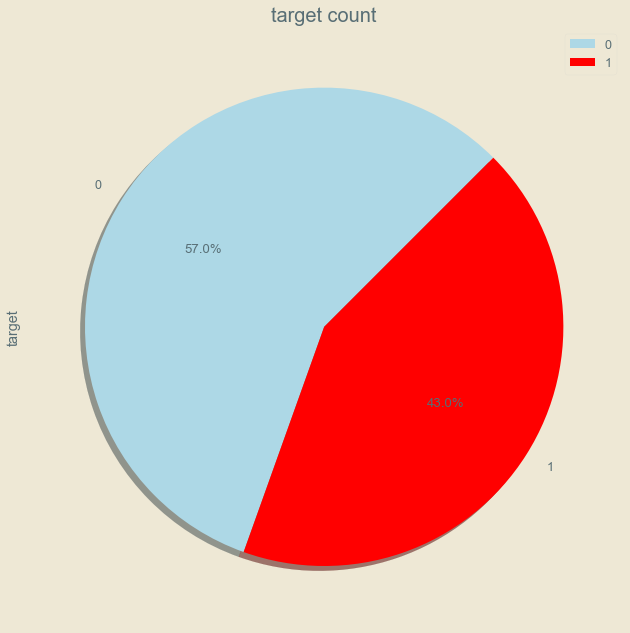

In [539]:
plt.figure(figsize=(11,11))
colors = ['lightblue', 'red']
expl = (0, 0.1)
df.target.value_counts().plot(kind='pie', legend=True, startangle=45, shadow=True, 
                             colors=colors, autopct='%1.1f%%')
plt.title('target count', fontsize=20)

In [543]:
spell = SpellChecker()

In [ ]:
misspelled = spell.unknown(df.tweets)

In [ ]:
import gensim
from gensim import corpora
import pkg_resources
from symspellpy.symspellpy import SymSpell

In [ ]:
corpus = df.tweets
nlp = Word2Vec(corpus, size=200,   
            window=6, min_count=1, sg=1, iter=40)
len(nlp.wv.vocab) # number of words in a dictionary

In [563]:

# convert target data with labelencoder
le = LabelEncoder()
y = list(df['target'])
le.fit_transform(y)
y = y.astype('category')
# define independent variable
X = list(df.tweets)
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                     test_size=.2, stratify=y)

NameError: name 'LabelEncoder' is not defined

In [ ]:

# verify shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))

print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))

In [ ]:

#(ngram_range=(1,2)
pipeline = Pipeline([ ('vect', CountVectorizer(ngram_range=(1,2))), 
                     ('tfidf', TfidfTransformer(use_idf=True))])
X_train = pipeline.fit_transform(X_train).todense() 
X_test = pipeline.transform(X_test).todense()


counter = Counter(y_train)
print(counter)

#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X_train)
count_terms = input_dimension[1]
print(count_terms)

In [ ]:
new_hash=[]
sym_spell = SymSpell(max_dictionary_edit_distance=1)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
for term in hashtags:
    if len(term)>1:
        result = sym_spell.word_segmentation(term)
        r = result.corrected_string
    else:
        r = ''
    new_hash.append(r)

In [ ]:
df[10:50]

In [ ]:
new_hash

In [ ]:
# Creating the dicti
word_dict = {} 

for row in df.tweets: 
    words = tokenizer.tokenize(row) 
    for word in words: 
        if word not in word_dict.keys(): 
            word_dict[word] = 1
        else: 
            word_dict[word] += 1
print(len(word_dict))
max(word_dict, key=word_dict.get)

In [ ]:
word_dict

In [ ]:
hlist=[]
for x in hashtags:
    x = x.str.replace('[^a-zA-Z]', '')
    hlist.append(x)